In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DSL SMART CITIES/reati_denunciati.csv')
df.head()

,anno_rilevamento_reato,Reati_denunciati_tipologia,reati_denunciati
0,2023,Strage,0
1,2023,Omicidi volontari totale,9
2,2023,Omicidi a scopo di furto o rapina,0
3,2023,Omicidi di tipo mafioso,0
4,2023,Omicidi a scopo terroristico,0


In [4]:
df['Reati_denunciati_tipologia'].unique()

array(['Strage ', 'Omicidi volontari totale',
       'Omicidi a scopo di furto o rapina', 'Omicidi di tipo mafioso',
       'Omicidi a scopo terroristico', 'Tentati omicidi ', 'Infanticidi',
       'Omicidi preterintenzionali ', 'Omicidi colposi totale',
       'Omicidi colposi  da incidente stradale', 'Percosse ',
       'Lesioni dolose ', 'Minacce ', 'Sequestri di persona ',
       'Ingiurie ', 'Violenze sessuali ', 'Atti sessuali con minorenne ',
       'Corruzione di minorenne ',
       'Sfruttamento e favoreggiamento della prostituzione',
       'Pornografia minorile e detenzione di materiale pedopornografico',
       'Furti', 'furti con strappo', 'Furti  con destrezza',
       'Furti  in abitazioni', 'Furti  in esercizi commerciali',
       'Furti  in auto in sosta',
       "Furti  di opere d'arte e materiale archeologico",
       'Furti di automezzi pesanti trasportanti merci',
       'Furti di ciclomotori', 'Furti di motocicli',
       'Furti di autovetture', 'Rapine totale', '

In [5]:

# Convert 'Reati_denunciati' column to numeric, coercing errors to NaN
df['reati_denunciati'] = pd.to_numeric(df['reati_denunciati'], errors='coerce')

# Fill NaN values with 0 (or another appropriate value)
df['reati_denunciati'] = df['reati_denunciati'].fillna(0)

# Convert the column to integers
df['reati_denunciati'] = df['reati_denunciati'].astype(int)

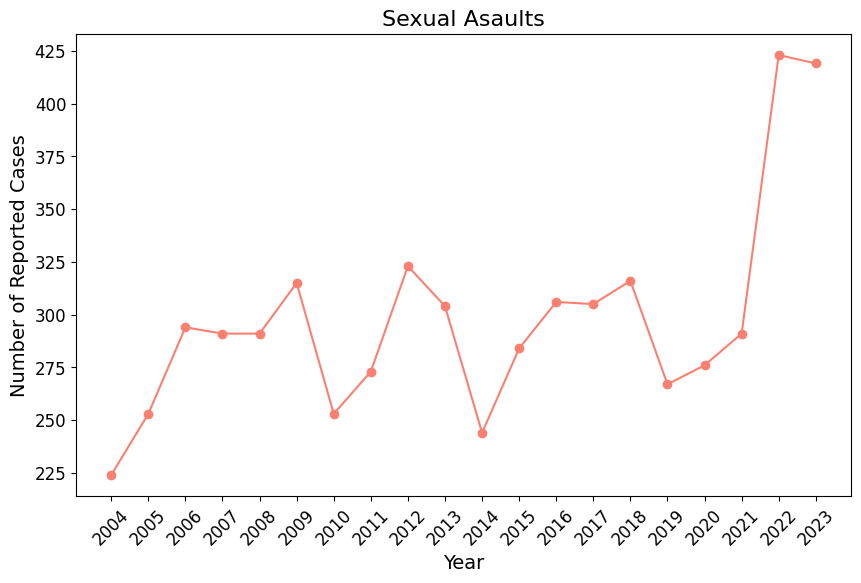

In [6]:
filtered_data = df[df['Reati_denunciati_tipologia'] == 'Violenze sessuali ']

# Group the data by year and sum the reported cases
time_series = filtered_data.groupby('anno_rilevamento_reato')['reati_denunciati'].sum()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, marker='o', linestyle='-', color='salmon')
plt.title('Sexual Asaults', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Reported Cases', fontsize=14)

# Format x-axis labels as integers
plt.xticks(ticks=range(time_series.index.min(), time_series.index.max() + 1), fontsize=12, rotation=45)

# Reduce the number of y-axis labels
plt.yticks(fontsize=12)
plt.show()

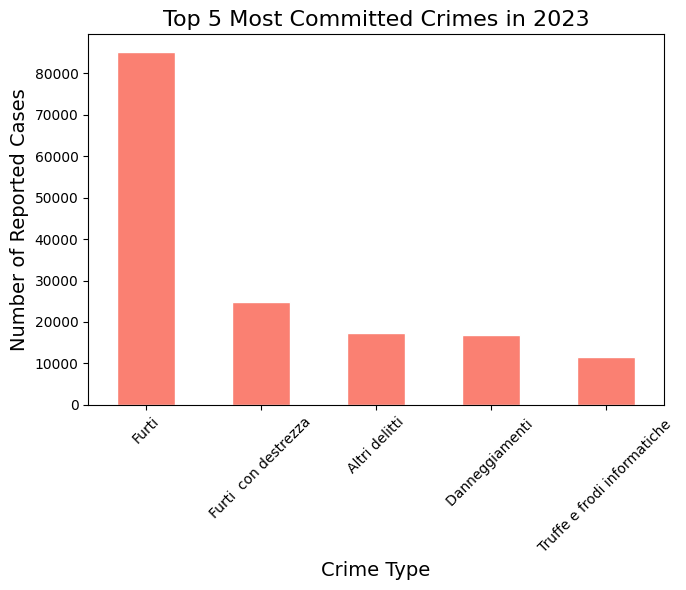

In [36]:
# Filter the data for the year 2023
data_2023 = df[(df['anno_rilevamento_reato'] == 2023) & (df['Reati_denunciati_tipologia']!='Reati totale')]

# Group by crime type and sum the reported cases
# Convert 'reati_denunciati' to numeric, handling errors
crime_counts_2023 = data_2023.groupby('Reati_denunciati_tipologia')['reati_denunciati'].sum()
crime_counts_2023 = pd.to_numeric(crime_counts_2023, errors='coerce')

# Get the top 5 most committed crimes
top_5_crimes = crime_counts_2023.nlargest(5)

# Plot the top 5 crimes
plt.figure(figsize=(7, 6))
top_5_crimes.plot(kind='bar', color='salmon', edgecolor='white', width=0.5)  # Decrease the width of the bars
plt.title('Top 5 Most Committed Crimes in 2023', fontsize=16)
plt.xlabel('Crime Type', fontsize=14)
plt.ylabel('Number of Reported Cases', fontsize=14)

# Adjust x-tick labels: rotate and reduce size
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()



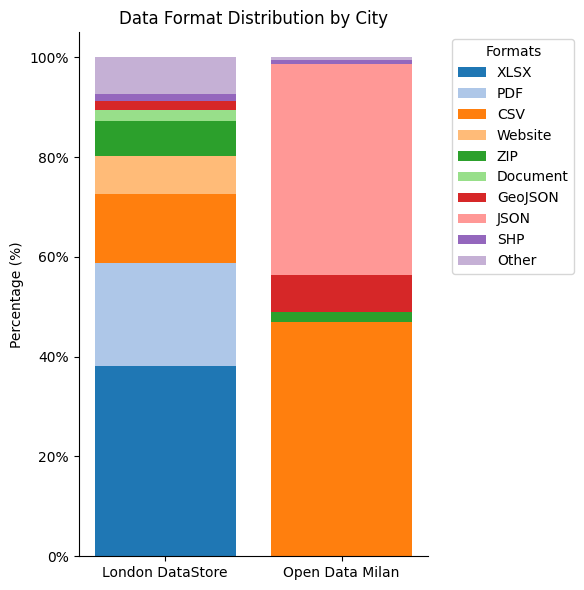

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Data
formats = ['XLSX', 'PDF', 'CSV', 'Website', 'ZIP', 'Document', 'GeoJSON', 'JSON', 'SHP', 'Other']
london = [38.20, 20.53, 13.85, 7.66, 6.90, 2.35, 1.75, 0.00, 1.31, 7.44]
milan = [0.00, 0.02, 46.96, 0.00, 1.95, 0.00, 7.49, 42.20, 0.78, 0.60]

# Color palette (using tab20)
colors = plt.cm.tab20.colors  # Get colors from the 'tab20' colormap

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

# Stacked bar chart for London
bottom_london = 0
for i, value in enumerate(london):
    ax.bar('London DataStore', value, bottom=bottom_london, color=colors[i], label=formats[i])
    bottom_london += value

# Stacked bar chart for Milan
bottom_milan = 0
for i, value in enumerate(milan):
    ax.bar('Open Data Milan', value, bottom=bottom_milan, color=colors[i])
    bottom_milan += value

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Labels and title
ax.set_ylabel('Percentage (%)')
ax.set_title('Data Format Distribution by City')

# Legend (outside the plot to avoid overlap)
ax.legend(title='Formats', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove unnecessary spines (top and right)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()